In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Load the cropped player image


In [3]:
image_path = "../data/cropped_images/gk_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

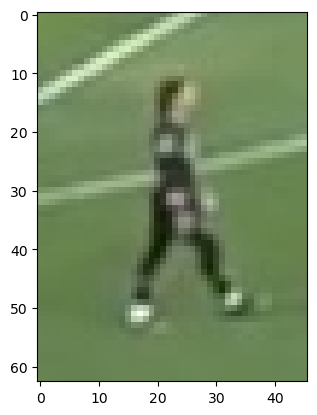

In [6]:
plt.imshow(image)
plt.show()

# Take top half of the image


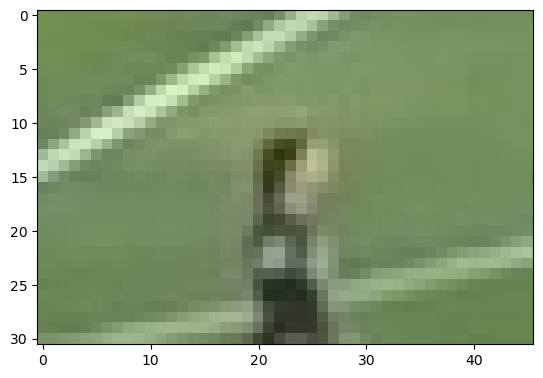

In [5]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into 2 clusters


d:\miniconda\envs\ft_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


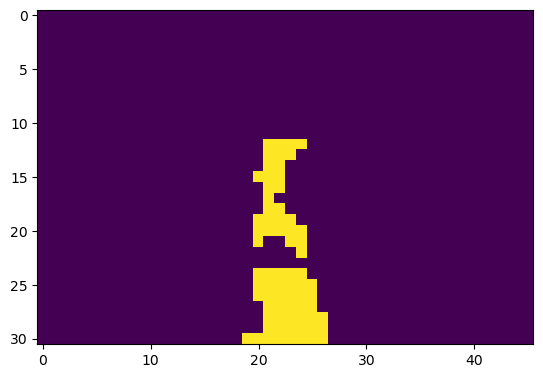

In [7]:
# Resize the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [8]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(f"Non player cluster: {non_player_cluster}")

Non player cluster: 0


In [9]:
player_cluster = 1 - non_player_cluster
print(f"Player cluster: {player_cluster}")

Player cluster: 1


In [10]:
kmeans.cluster_centers_[player_cluster]

array([66.55555556, 73.79166667, 53.125     ])